# Varying the number of nodes in the 1st layer

We calculated the precision at every 1000th step and executed for a a max step of 300,000.

In [53]:
%matplotlib inline
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt



In [54]:
h1 = []
h1 += [np.genfromtxt('tests/hid1/hid1_1.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_2.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_4.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_8.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_16.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_32.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_64.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_128.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_256.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_512.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_1024.csv', delimiter=',')]

for i, arr in enumerate(h1):
    # strip last value
    h1[i] = arr[:-1].reshape((-1,3))

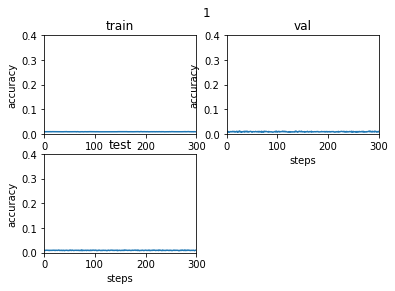

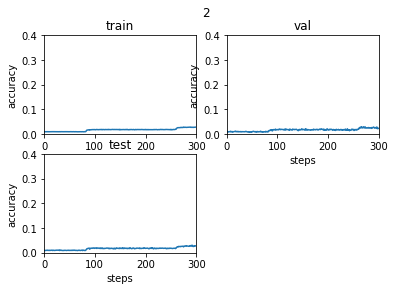

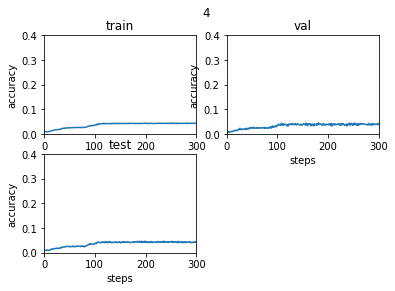

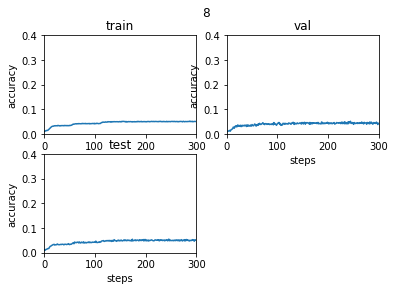

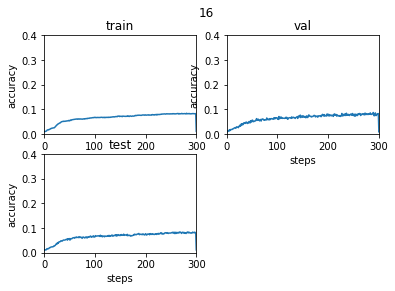

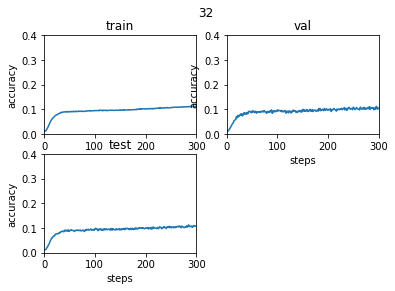

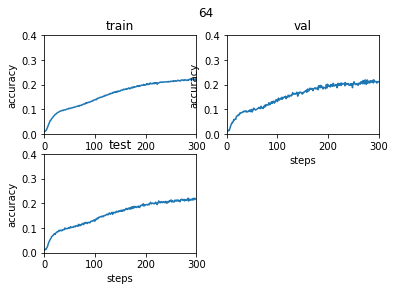

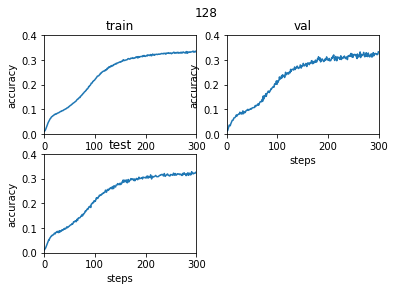

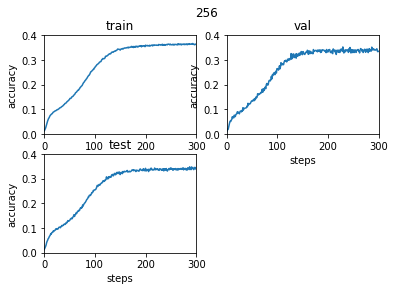

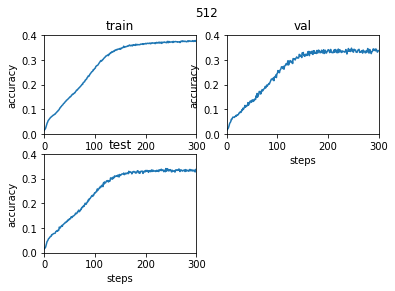

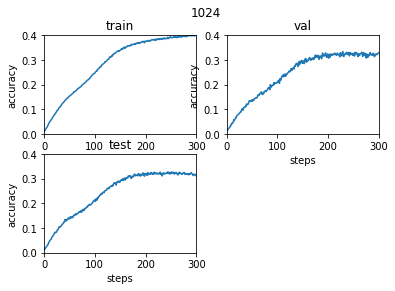

In [55]:
for i, arr in enumerate(h1):
    titles = ['train', 'val', 'test']
    plt.figure()
    for j in range(3):
        plt.subplot(2,2,j+1)
        plt.plot((h1[i])[:,j])
        plt.title(titles[j])
        plt.xlim(0,300)
        plt.ylim(0,.4)
        plt.xlabel('steps')
        plt.ylabel('accuracy')
    plt.suptitle(2**i)
    plt.show()

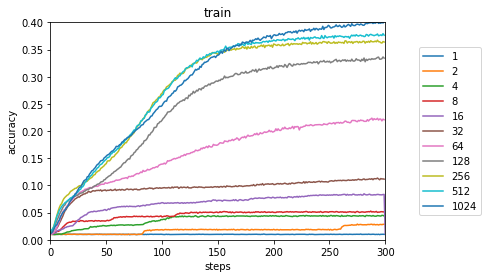

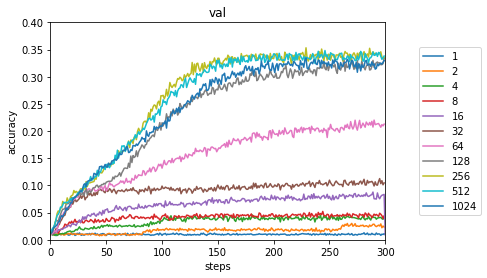

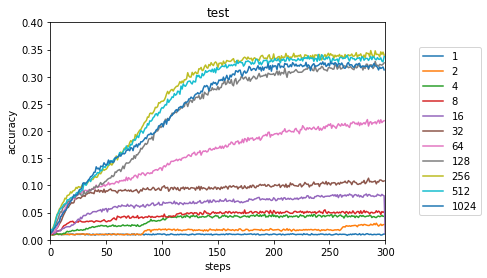

In [56]:
def plot_group(ds, j, lbl):
    '''
    ds - dataset for plotting
    j - (0) train, (1) val, (2), test
    lbl - label for datasets
    '''
    plt.figure()
    titles = ['train', 'val', 'test']
    for i, arr in enumerate(ds):
        plt.plot((ds[i])[:,j], label=lbl[i])
        plt.xlim(0,300)
        plt.ylim(0,.4)
        plt.xlabel('steps')
        plt.ylabel('accuracy')

    plt.title(titles[j])
    plt.legend(bbox_to_anchor=[1.3, 0.5], loc='center right')

    plt.show()

lbl = [2**x for x in range(11)]
plot_group(h1, 0, lbl)
plot_group(h1 ,1, lbl)
plot_group(h1, 2, lbl)

# Trying 100 x 100

In [57]:
oneH = []
oneH += [np.genfromtxt('tests/100x100/100x100_100.csv', delimiter=',')]

for i, arr in enumerate(oneH):
    # strip last value
    oneH[i] = arr[:-1].reshape((-1,3))
print oneH[0].shape

(300, 3)


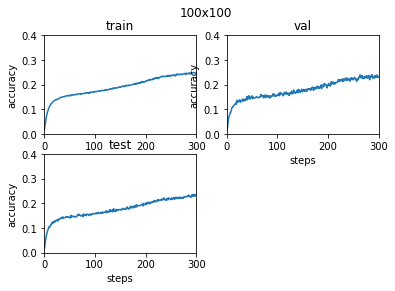

In [58]:
for i, arr in enumerate(oneH):
    titles = ['train', 'val', 'test']
    plt.figure()
    for j in range(3):
        plt.subplot(2,2,j+1)
        plt.plot(oneH[i][:,j])
        plt.title(titles[j])
        plt.xlim(0,300)
        plt.ylim(0,.4)
        plt.xlabel('steps')
        plt.ylabel('accuracy')
    plt.suptitle('100x100')
    plt.show()

# Vary datasize

With the initial run of data at 300k data points, we run tests to see if more data points yields better training accuracy. We did if over 300k steps. Each incremental test adds 50k data points.

In [60]:
ds = []

ds+= [np.genfromtxt('tests/datasize/datasize_300000.csv', delimiter=',')]
ds+= [np.genfromtxt('tests/datasize/datasize_350000.csv', delimiter=',')]

for i, arr in enumerate(ds):
    # strip last value
    ds[i] = arr[:-1].reshape((-1,3))

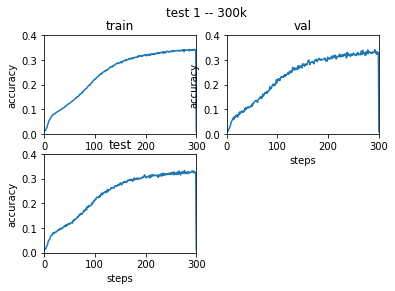

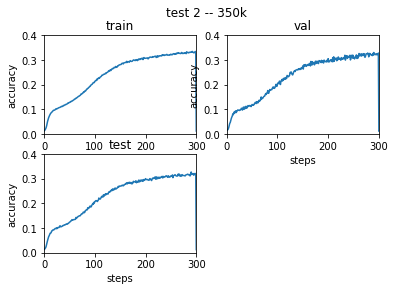

In [61]:
for i, arr in enumerate(ds):
    titles = ['train', 'val', 'test']
    plt.figure()
    for j in range(3):
        plt.subplot(2,2,j+1)
        plt.plot((ds[i])[:,j])
        plt.title(titles[j])
        plt.xlim(0,300)
        plt.ylim(0,.4)
        plt.xlabel('steps')
        plt.ylabel('accuracy')
    plt.suptitle('test ' + str(i+1) + ' -- ' + str(300 + (i)*50)+'k')
    plt.show()


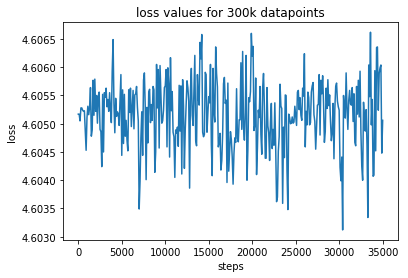

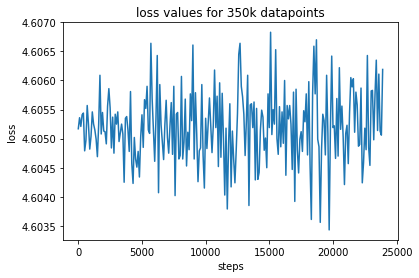

In [69]:
loss = []

loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_300000.csv', delimiter=',')]
loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_350000.csv', delimiter=',')]
for i, arr in enumerate(loss):
    plt.figure()
    plt.plot([100*j for j in range(len(arr))],arr)
    plt.title('loss values for '+str(300 + i*50)+'k datapoints')
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.show()


## Comparing accuracy of increasing datasize for training

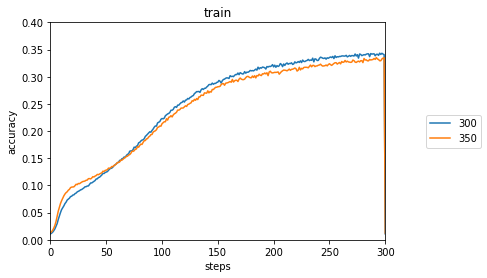

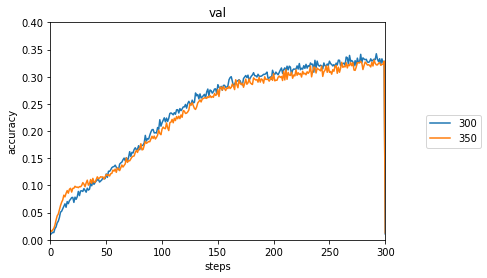

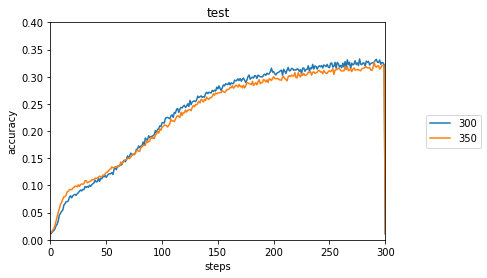

In [63]:
lbl = [300 + (x)*50 for x in range(11)]
plot_group(ds, 0, lbl)
plot_group(ds, 1, lbl)
plot_group(ds, 2, lbl)

## CNN
Convolution Network by zeroing out weights of non-neighbors

In [64]:
ds = []

ds+= [np.genfromtxt('tests/cnn/cnn_300000.csv', delimiter=',')]

for i, arr in enumerate(ds):
    # strip last value
    ds[i] = arr[:-1].reshape((-1,3))

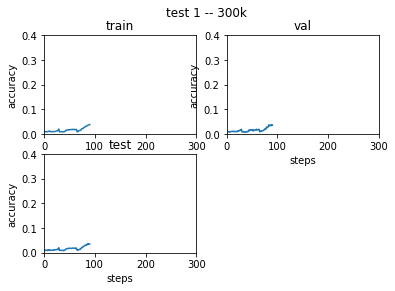

In [65]:
for i, arr in enumerate(ds):
    titles = ['train', 'val', 'test']
    plt.figure()
    for j in range(3):
        plt.subplot(2,2,j+1)
        plt.plot((ds[i])[:,j])
        plt.title(titles[j])
        plt.xlim(0,300)
        plt.ylim(0,.4)
        plt.xlabel('steps')
        plt.ylabel('accuracy')
    plt.suptitle('test ' + str(i+1) + ' -- ' + str(300 + i*50)+'k')
    plt.show()


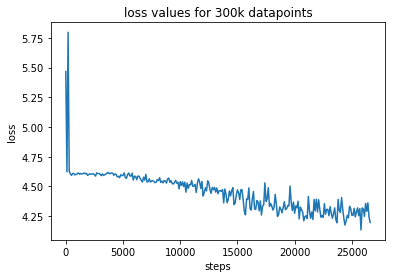

In [66]:
# cnn

loss = []

loss += [np.genfromtxt('tests/cnnloss/cnnloss_300000.csv', delimiter=',')]
for i, arr in enumerate(loss):
    plt.figure()
    plt.plot([100*j for j in range(len(arr))],arr)
    plt.title('loss values for '+str(300 + i*50)+'k datapoints')
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.show()


## Comparing regular vs cnn

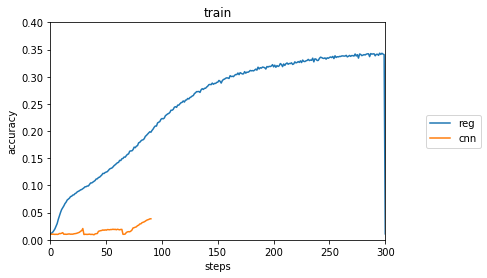

In [67]:
reg_vs_cnn = []

reg_vs_cnn += [np.genfromtxt('tests/datasize/datasize_300000.csv', delimiter=',')]
reg_vs_cnn += [np.genfromtxt('tests/cnn/cnn_300000.csv', delimiter=',')]

for i, arr in enumerate(reg_vs_cnn):
    # strip last value
    reg_vs_cnn[i] = arr[:-1].reshape((-1,3))

reg_vs_cnn = np.array(reg_vs_cnn)

plot_group(reg_vs_cnn, 0, ['reg','cnn'])

## Debugging with smaller datasize

Using 50k datapoints

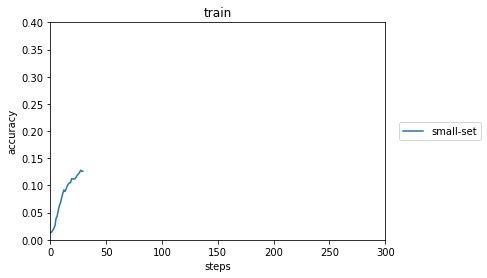

301


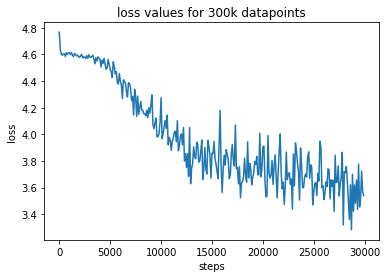

In [68]:
ds = []

ds += [np.genfromtxt('tests/small-datasize/small-datasize_300000.csv', delimiter=',')]

for i, arr in enumerate(ds):
    # strip last value
    ds[i] = arr[:-1].reshape((-1,3))

ds = np.array(ds)

plot_group(ds, 0, ['small-set'])

loss = []

loss += [np.genfromtxt('tests/small-datasizeloss/small-datasizeloss_300000.csv', delimiter=',')]
print len(loss[i])
for i, arr in enumerate(loss):
    plt.figure()
    plt.plot([100*j for j in range(len(arr))],arr)
    plt.title('loss values for '+str(300 + i*50)+'k datapoints')
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.show()
